In [1]:
import pandas as pd
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 10, 100

plt.rcParams['figure.dpi'] = 100

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 44}


In [2]:
def getfile(alg, prob, pop, k, n, gc, gd, ite):
    if alg =="GSA" and prob == 0:
        return '{}_prob_{}_pop_{}_k_{}_n_{}_gc_{}_gd_{}_iter_{}.csv'.format(alg, prob, pop, k, n, gc, gd, ite)
    elif alg =="GSA" and prob == 1:
        return ""
    

def getcsv(alg, prob, pop, k, n, gc, gd, ite):
    return pd.read_csv(getfile(alg, prob, pop, k, n, gc, gd, ite))

def plot_dgd(alg, prob, pop, k, n, gc, gd, ite):
    min_lists = []
    for i in gd:
        if isfile(getfile(alg, prob, pop, k, n, gc, i, ite)):
            min_lists.append((getfile(alg,prob, pop, k, n, gc, i, ite), getcsv(alg, prob, pop, k, n, gc, i, ite)))
    return min_lists

def plot_dgc(alg, prob, pop, k, n, gc, gd, ite):
    min_lists = []
    for i in gc:
        if isfile(getfile(alg, prob, pop, k, n,i,gd, ite)):
            min_lists.append( (getfile(alg,prob, pop, k, n, i, gd, ite), getcsv(alg, prob, pop, k, n, i, gd, ite)))
    print(min_lists)
    return min_lists

def plotgrid(alg, prob, pop, k, n, gc, gd, ite):
    fig, axs = plt.subplots(len(gd))
    plot_axes_x = 0
    plt.tight_layout()
    for const in gc:
        gc_data = plot_dgd(alg, prob, pop,k,n,const,gd, ite)
        for i in gc_data:
            axs[plot_axes_x].plot(i[1]['Average'], label=i[0])
            axs[plot_axes_x].legend()
            if plot_axes_x == len(gd)-1:
                plot_axes_x = 0
            else:
                plot_axes_x = plot_axes_x + 1
            
    for ax in axs.flat:
        ax.set(xlabel='iterations', ylabel='cost')
        
    plt.tight_layout()
    plt.savefig("alg_{}_pop_{}_k_{}_n_{}_gc_{}_gd_{}_iter_{}.png".format(alg, pop, k, n, gc,gd,ite))       

/home/jgafur/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


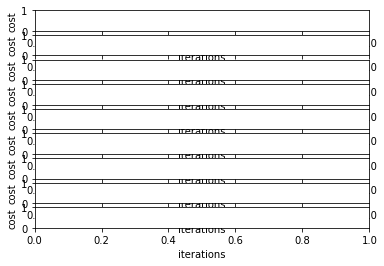

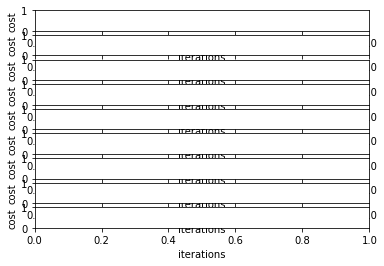

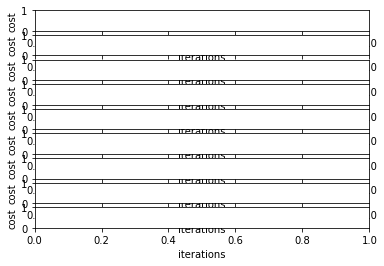

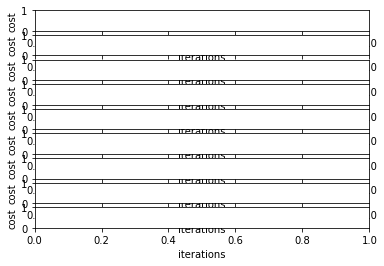

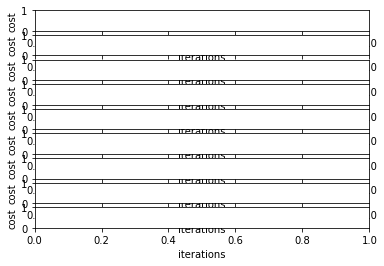

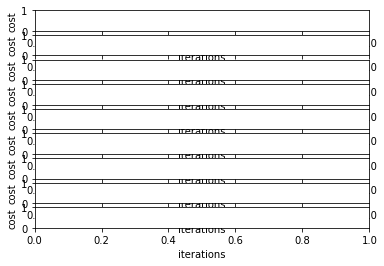

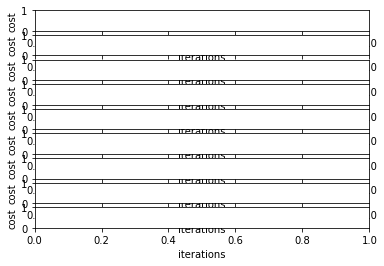

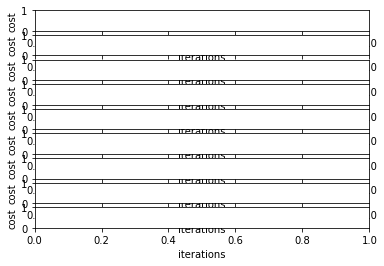

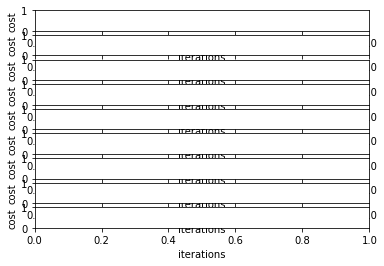

In [3]:
onlyfiles = [f for f in listdir('.') if isfile(join('.', f)) and 'csv' in f]

gd = [.1,.2,.3,.4,.5,.6,.7,.8,.9]
gc = [.1,.2,.3,.4,.5,.6,.7,.8,.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9]
pop = [10,50,100]
ite = [10,50,100]
k = 2
n = 2
prob = 0
for p in pop:
    for i in ite:
        plotgrid("GSA",prob, p, k,n,gc,gd,i)
        